# Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import morphology

# Lecture 1 / Ex. 1

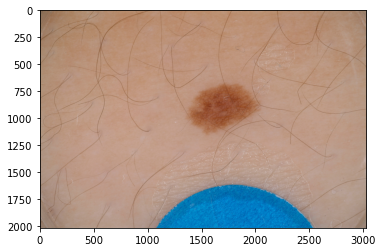

In [11]:
# Load an image and display it

im = plt.imread('../data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [12]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want


(2016, 3024, 3)
uint8


[  0 121 196]


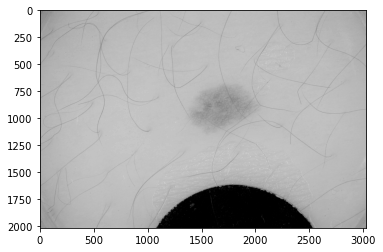

In [13]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')



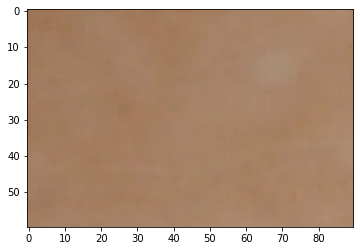

In [14]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)

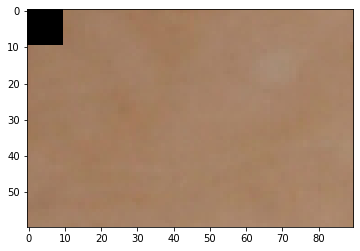

In [15]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)

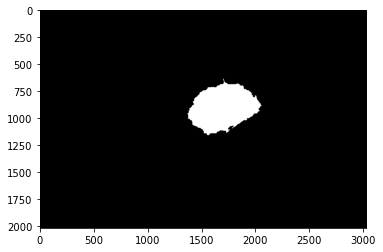

In [24]:
mask=plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')

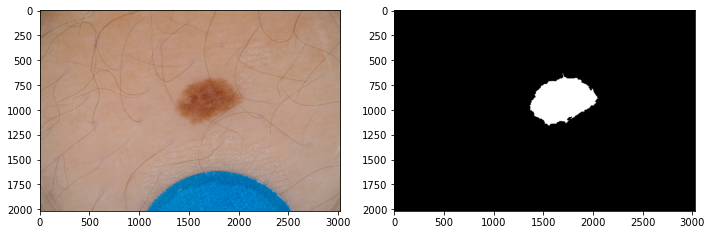

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

In [25]:
# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)

NameError: name 'Image' is not defined

In [ ]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('../data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

In [ ]:
plt.hist(gray)

In [ ]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')

In [ ]:
# Load the mask and display it

mask=plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)

axs[0].imshow(im)
axs[0].set_title("Image")
axs[1].imshow(mask)
axs[1].set_title("Segmentation")

In [ ]:
print(im.shape)
im[500]

In [ ]:
print(mask.shape)
mask[500]

In [26]:
#From TA Camilla
#Measure area: the sum of all white pixels in the mask image

area = np.sum(mask)

#Measure perimeter: first find which pixels belong to the perimeter.

struct_element = morphology.disk(1)
mask_erotion = morphology.binary_erosion(mask, struct_element)
image_perimeter = mask - mask_erotion

#simple
width_max = 0
height_max = 0

for row in image_perimeter:
    result = np.where(row==1)[0]
    if result.size != 0:
        width_diff = result[-1] - result[0]
        if width_diff > width_max:
            width_max = width_diff
            
for col in image_perimeter.transpose():
    result = np.where(col == 1)[0]
    if result.size != 0:
        height_diff = result[-1] - result[0]
        if height_diff > height_max:
            height_max = height_diff


In [21]:
print("width_max:", width_max)
print("height_max:", height_max)

width_max: 654
height_max: 480


In [22]:
print(image_perimeter)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
import skimage
print(skimage.__version__)

0.16.2
